# Ford Go Bike Trip Data Set: Analysis and Presentation
## by (Mirna Slim)

## Preliminary Wrangling

> The data set consist of bike trip data from the Ford Go bike transportation system/network. It consists of the distance and duration of bike trip indicating lat, long of starting and arrvinng locations as well as the gender and age of the bike rider and whether or not he/she is a customer or not. 

### Import all packages and set plots to be embedded inline

In [133]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt 
import warnings
warnings.filterwarnings("ignore")
warnings.warn("second example of warning!")
%matplotlib inline

### Load Data set
> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [70]:
# load bike trip data set
bike_trips = pd.read_csv('201902-fordgobike-tripdata.csv')
bike_trips.head(2);

### What is the structure of your dataset?

In [71]:
bike_trips.shape

(183412, 16)

#### A total of 183,412 data entries are provided inthe data frame; most of which have 16 features refelcting specifics about bike trips. Trip duration is the only quantitative variables. User age is a discreet variable. Time variables are continuous variables. Most of the remaining variables are categorical. 

In [72]:
# rows/features with missing values:
bike_trips.isnull().sum();

In [73]:
bike_trips.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

#### Some of the features have missing values. The data on features with missing values will be presented and cleaned in the "Data Cleaning" section. 

### What is/are the main feature(s) of interest in your dataset?

> The most important features in the data set are:
>
1- What is the bike service mostly used for (long vs. short commute)?  
2- What are the busiest times of the day?
3- waht are the busiest stations? do we need to expand them (add more bikes/station)?  
4- Do we need more stations? what is the optimum distances among stations to render the service most useful?  
5- What is the gender and age of people that use the bikes?  
6- Potential increase of customers: can the ratio of subscribers/customers indicate anything? 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Analyzing the durations of trips, activities of various stations (counts of trips starting and finishing at certain stations), gender and age of users.

## Dataframe Cleaning

> - Check for Duplicated rows.  
> - Creating features (user age, end-start time difference). 
> - Check for and remove rows with missing values.  
> - Remove features not part of any analysis.

#### - There is no trip_id to see if trip information is duplicated. It will be assumed that every trip is a unique event. 

In [74]:
# check for duplicated rows:
bike_trips.duplicated().sum();

In [75]:
# clean up non-unique users
#df['???'].duplicated().sum()

In [76]:
# convert duration time to hours 
bike_trips['duration_hr'] = bike_trips['duration_sec']/60/60;

In [77]:
# add an entry calculating the age of the users
bike_trips['user_age'] = 2020 - bike_trips['member_birth_year']

In [78]:
# change date+time string to only time
#bike_trips['end_time2'] = pd.Timedelta.total_seconds(bike_trips['end_time'])
#bike_trips['start_time2'] = pd.Timedelta.total_seconds(bike_trips['start_time'])


#bike_trips['end_time2'] = pd.to_timedelta(bike_trips['end_time'])
#bike_trips['start_time2'] = pd.to_timedelta(bike_trips['start_time'])

bike_trips['end_time2'] = pd.to_datetime(bike_trips['end_time'])
bike_trips['start_time2'] = pd.to_datetime(bike_trips['start_time'])
#trips_filt['end_time2'] = trips_filt.set_index('end_time2')

#trips_filt['end_time2'].index.values.astype(float)
#trips_filt['end_time2'] = trips_filt['end_time2'].astype('datetime64').astype(float)

In [79]:
bike_trips['time_diff'] = bike_trips['end_time2'] - bike_trips['start_time2']
bike_trips['time_diff'];
#trips_filt['end_time2'].astype(float)

In [80]:
# change date+time string to only time
#trips_filt['end_time2'] = dt.datetime.strptime(trips_filt['end_time'])
#trips_filt['start_time2'] = dt.datetime.strptime(trips_filt['start_time'])

In [81]:
#trips_filt['end_time2'] = pd.to_datetime(trips_filt['end_time'], format='%Y-%m-%d %H:%M:%S')

In [82]:
# rows/features with missing values:
bike_trips.isnull().sum();

#### - 197 entries are missing from the start and end stations. 8,265 entries are missing from the the user age and user gender features. These rows will be removed from the data frame before any explatory and explanatory analyses. 

In [83]:
# delete all rows for which column 'group' is control and 'lading_page' is new_page:
trips_filt = bike_trips
trips_filt.dropna(inplace = True)
trips_filt.shape;

#### - Remove Uneeded Features

In [84]:
# make a copy of the dataframe:
trips_filt2 = trips_filt;

In [85]:
# drop no longer needed columns
trips_filt2.drop(['duration_sec', 'start_time', 'end_time', 'start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'member_birth_year'], axis = 1, inplace = True);
trips_filt2.shape;

In [86]:
trips_filt2.describe();

In [87]:
base_color = sb.color_palette()[0];

In [88]:
trips_filt2['start_station_id'].value_counts();

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

### 1- Starting/Ending Stations Usage/Counts and Popular Routes

> - It is not clear if the count/station (starting station) actually reflect activity and how busy a station is or a bias in the data acquisition. 
> - There is no information to suggest that there is bias accessing data download from some bikes and not the othere. Therefore, it will be assumed that station with high counts reflecting trips starting from them are busy and popular stations. 

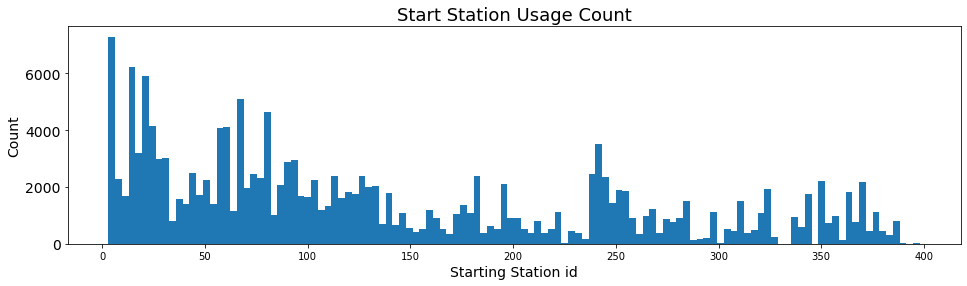

In [89]:
base_color = sb.color_palette()[0]
plt.figure(figsize = (16,4))
bins = 120

plt.hist(data = trips_filt2, x = 'start_station_id', color = base_color, bins=bins)

plt.title('Start Station Usage Count', fontsize = 18)
#plt.ylim(0,700)
#plt.xlim(0,12)
#plt.yscale('log')
plt.xlabel('Starting Station id', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
#plt.tick_params(axis='x', labelsize=8)
plt.tick_params(axis='y', labelsize=14)
#plt.xticks(range(3, 329,30),rotation = 90)

In [189]:
# find the number of startign stations from which most bike trips starts 
on_station = trips_filt2['start_station_name'].unique()
                       
off_station = trips_filt2['end_station_name'].unique()
on_station;

In [91]:
busy_onstation = trips_filt2['start_station_name'].value_counts().head(100)
busy_offstation = trips_filt2['end_station_name'].value_counts().head(100)
#busy_station.head(330)
busy_onstation.shape;

In [92]:
# create a label list of the 100 busiest stations. 
labelson = busy_onstation.index.str.title() # alternative to commented out line above
labelsoff = busy_offstation.index.str.title() # alternative to commented out line above
labelson, labelsoff;

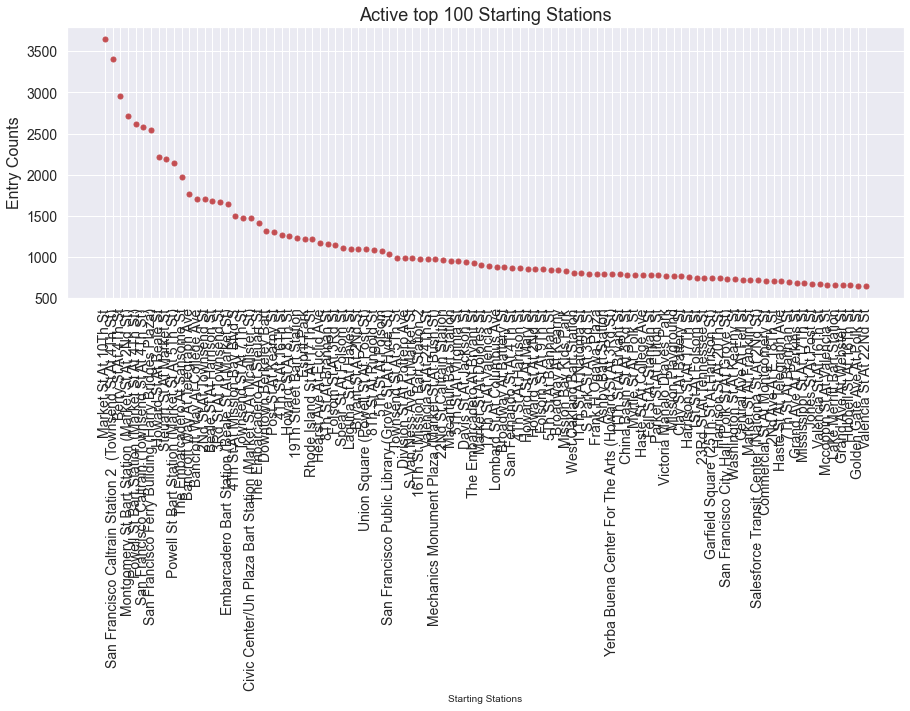

In [191]:
# plot the entry counts of the busiest 100 starting station in the dataset
#plt.figure(figsize = (15,4))

fig, ax20 = plt.subplots(figsize=(15,5))
#sb.countplot(data = busy_onstation, x = labels, color = base_color)
plt.scatter(y=busy_onstation, x=labelson, s=25, c='r', label = 'Genre Count')

ax20.set_title('Active top 100 Starting Stations',  fontsize = 18)
ax20.set_xlabel('Starting Stations', fontsize = 10)
ax20.set_ylabel('Entry Counts', fontsize = 16)

plt.xticks(rotation = 90);
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
#plt.legend(loc="upper right")

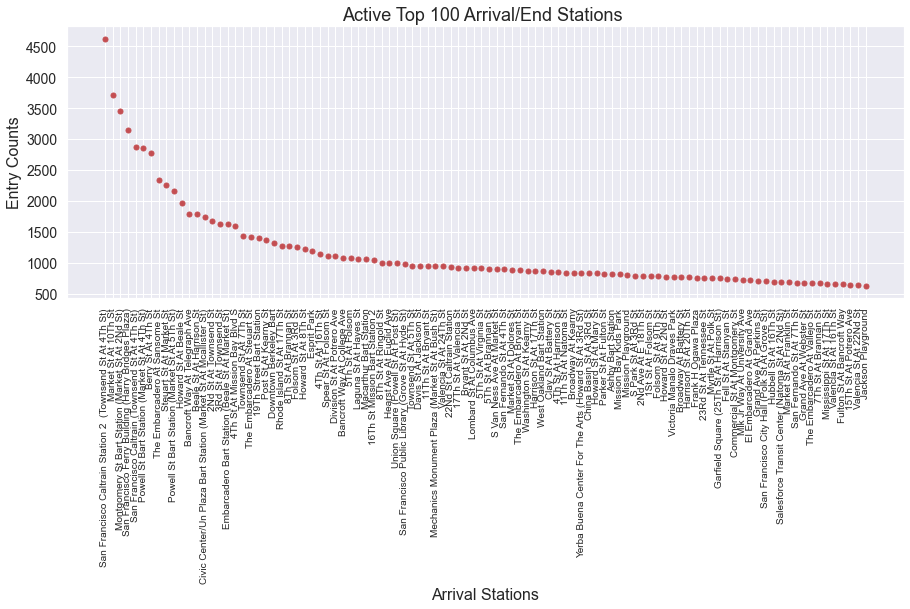

In [192]:
# plot the entry counts of the busiest 100 arrival station in the dataset
#plt.figure(figsize = (15,4))

fig, ax20 = plt.subplots(figsize=(15,5))
#sb.countplot(data = busy_onstation, x = labels, color = base_color)
plt.scatter(y=busy_offstation, x=labelsoff, s=25, c='r', label = 'Genre Count')

ax20.set_title('Active Top 100 Arrival/End Stations ',  fontsize = 18)
ax20.set_xlabel('Arrival Stations', fontsize = 16)
ax20.set_ylabel('Entry Counts', fontsize = 16)

plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=14)
plt.xticks(rotation = 90);

#plt.legend(loc="upper right")

#### Get the counts of entries from each starting station. 

In [95]:
df_sums = trips_filt.groupby(trips_filt2['start_station_id']).count()

In [96]:
df_sums.head(2);

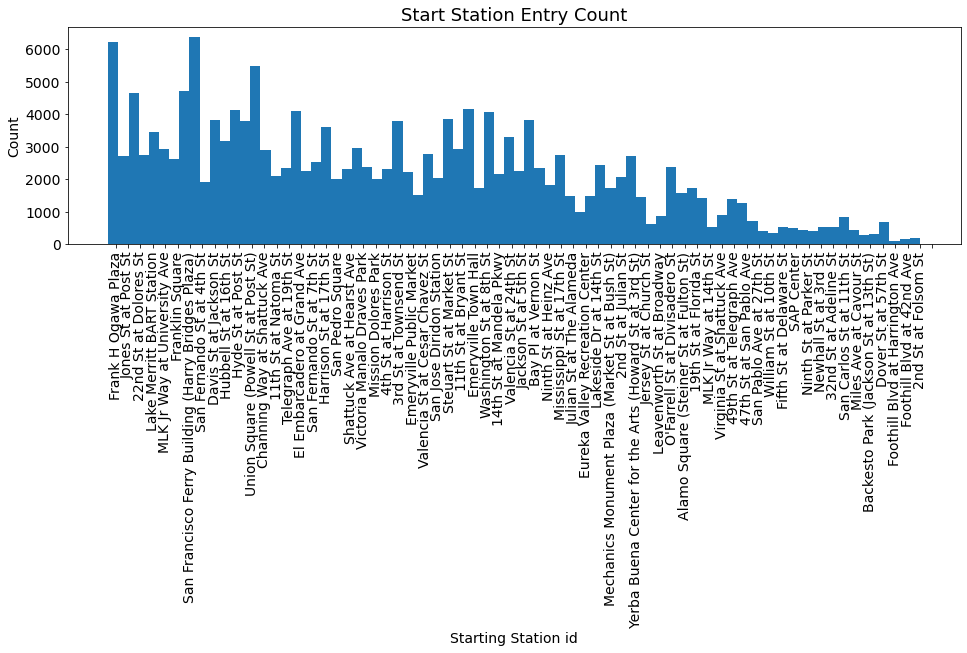

In [97]:
plt.figure(figsize = (16,4))
bins=80
plt.hist(data = trips_filt2, x = 'start_station_name', color = base_color, bins=bins)
#sb.countplot(data = trips_filt2, x = 'start_station_name', color = base_color)
plt.xticks(range(3, 335, 5), rotation = 90)
plt.title('Start Station Entry Count', fontsize = 18)
#plt.ylim(0,700)
#plt.xlim(0,12)
#plt.yscale('log')
plt.xlabel('Starting Station id', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

#### The most populat trip routes:
> - The most popular bike trips and active stations leave from Very St at 4th st and arrives at the Ferry Buildg. We have no map inforamtion to analyze trip distances (even with having latitudes and longitudes of stations.)

In [98]:
# Code suggested by a mentor on Udacity:
popular_start = trips_filt2['start_station_name'].mode()[0]    
popular_end = trips_filt2['end_station_name'].mode()[0]     

popular_trip=trips_filt2.groupby(['start_station_name', 'end_station_name']).size().nlargest(1)    
popular_trip

start_station_name  end_station_name                                  
Berry St at 4th St  San Francisco Ferry Building (Harry Bridges Plaza)    327
dtype: int64

In [99]:
#print("\nThe most popular start station is {}; \           
#  \nThe most popular end station is {}; \           
#  \nThe most popular trip from start to end is             
#\n{}".format(popular_start, popular_end, popular_trip))

### 2- Trip Duration

#### The following section is to investigate if there are some station from which long trips are intiated. this might help suggest whether or not more bikes are needed in such stations.  
#### Total duration (in hours) of all trips starting for a given station: 

In [100]:
tot_duration = trips_filt2.groupby('start_station_name').duration_hr.sum();

In [101]:
# create labels for the starting stations
labels_tot = tot_duration.index.str.title() # alternative to commented out line above
labels_tot;

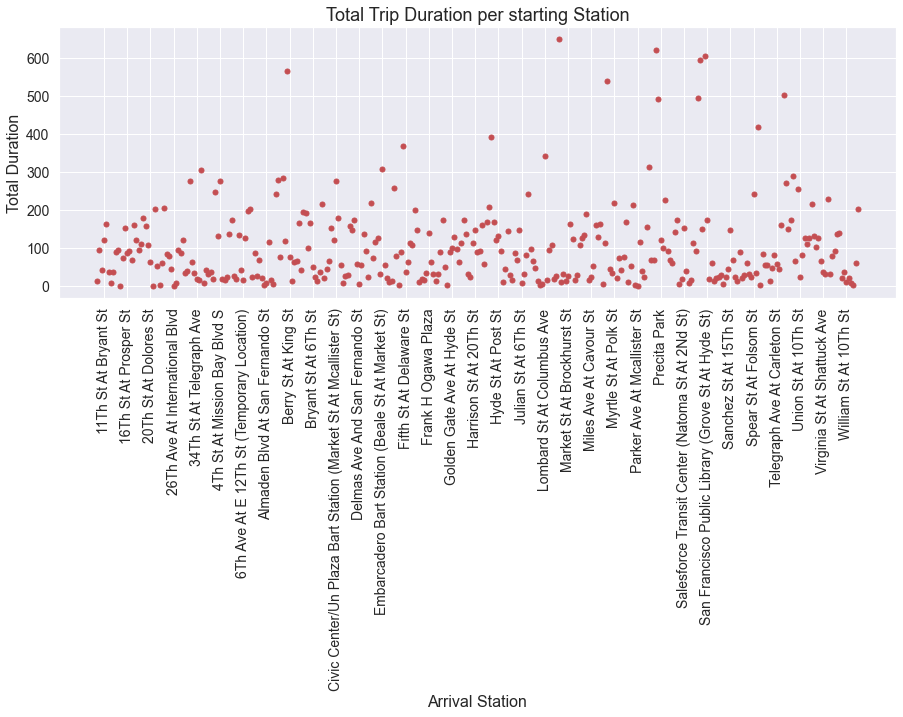

In [194]:
# plot the total duration per starting station
#plt.figure(figsize = (15,4))

fig, ax20 = plt.subplots(figsize=(15,5))
#sb.countplot(data = busy_onstation, x = labels, color = base_color)
plt.scatter(y = tot_duration, x = labels_tot, s=25, c='r', label = 'Genre Count')

ax20.set_title('Total Trip Duration per starting Station',  fontsize = 18)
ax20.set_xlabel('Arrival Station', fontsize = 16)
ax20.set_ylabel('Total Duration', fontsize = 16)

plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.xticks(range(3, 330, 10), rotation = 90);

#plt.legend(loc="upper right")

In [103]:
trips_filt2['long_trip'] = (trips_filt2.groupby('start_station_name').duration_hr.sum())>200
trips_filt2['long_trip'];

> Most of the stations fall within the same clouds of total/cummulative trip duration between a fraction (0.35 hr) to 200 hours in duration. Is there a reson for having long trips starting from certain stations, and/or few stations remarkably busier than the rest?  

> Isolate starting stattions with the highest total trip duration:

In [104]:
duration_long = tot_duration[tot_duration > 200]
labels_long = duration_long.index.str.title() # alternative to commented out line above

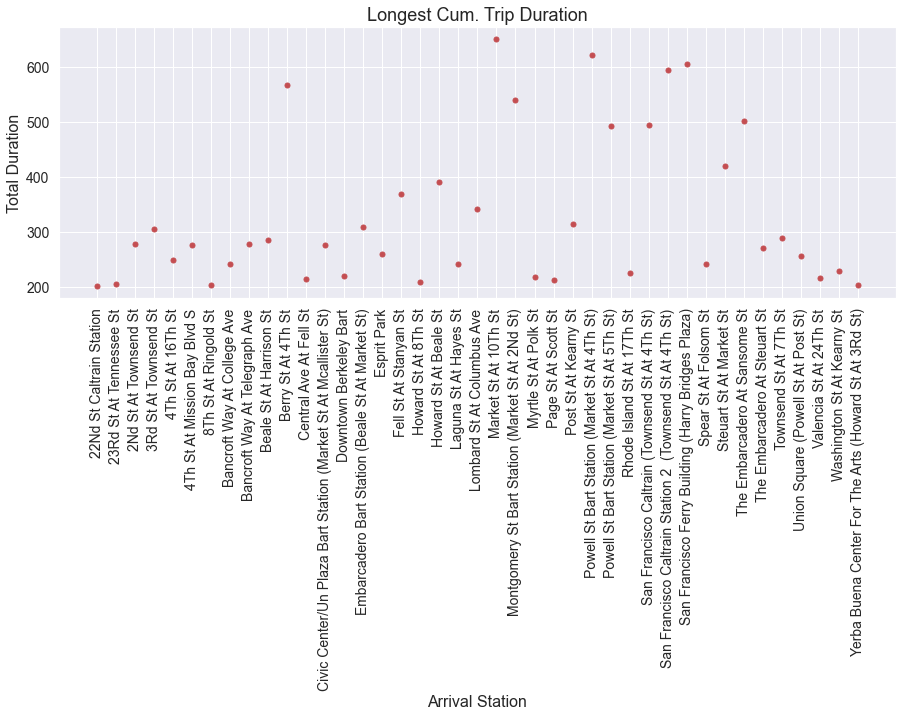

In [195]:
# plot the total duration per starting station
#plt.figure(figsize = (15,4))

fig, ax20 = plt.subplots(figsize=(15,5))
#sb.countplot(data = busy_onstation, x = labels, color = base_color)
plt.scatter(y = duration_long, x = labels_long, s=25, c='r', label = 'Genre Count')

ax20.set_title('Longest Cum. Trip Duration',  fontsize = 18)
ax20.set_xlabel('Arrival Station', fontsize = 16)
ax20.set_ylabel('Total Duration', fontsize = 16)

plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.xticks(rotation = 90);

#### It might be helpful to investigate if more bikes are needed in the above stations and/or a different maintenance schedule than the rest of the stations. This is because, the bikes from these stations are taken on longer trips. 

#### - Distribution of Trip Duration

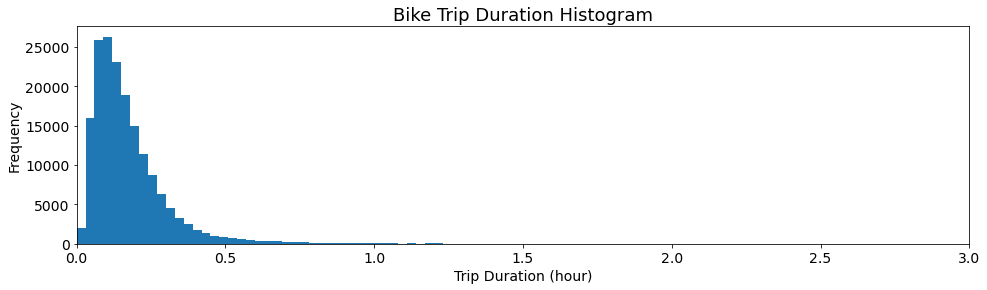

In [106]:
# Plotting a histogram of trip duration

binsize = 0.03
bins = np.arange(0, trips_filt2['duration_hr'].max()+binsize, binsize);
plt.figure(figsize = (16,4));
plt.hist(data = trips_filt2, x = 'duration_hr', bins = bins);
plt.xlim(0,3)
#plt.ylim(0,100)
plt.title('Bike Trip Duration Histogram', fontsize = 18)
plt.xlabel('Trip Duration (hour)', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)

plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
#plt.xscale('log')

#### Changing axes' limits reflect the skwenedd of the distribution and its long tails reaching trip durations reaching 20 hours!!!!

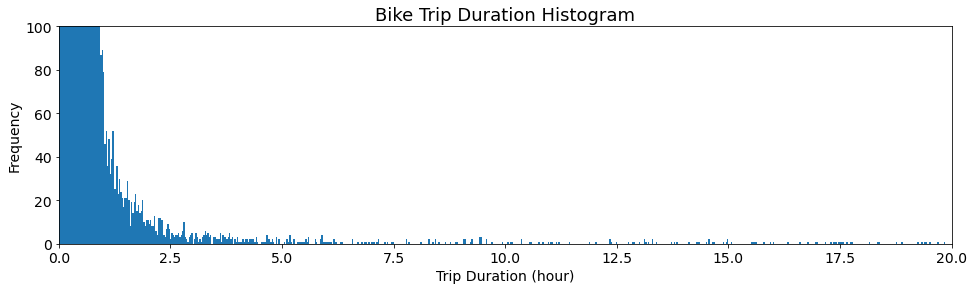

In [107]:
# Plotting a histogram of trip duration

binsize = 0.03
bins = np.arange(0, trips_filt2['duration_hr'].max()+binsize, binsize);
plt.figure(figsize = (16,4));
plt.hist(data = trips_filt2, x = 'duration_hr', bins = bins);
plt.xlim(0,20)
plt.ylim(0,100)
plt.title('Bike Trip Duration Histogram', fontsize = 18)
plt.xlabel('Trip Duration (hour)', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)

plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
#plt.xscale('log')

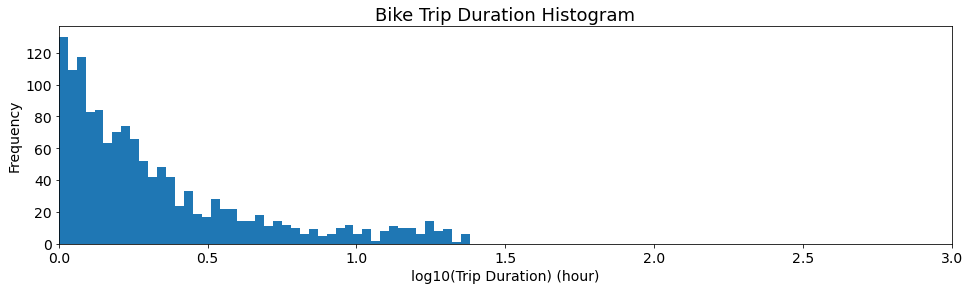

In [33]:
# Plotting a histogram of trip duration
trips_filt2['duration_hr2'] = np.log10(trips_filt2['duration_hr'])

binsize = 0.03
bins = np.arange(0, trips_filt2['duration_hr2'].max()+binsize, binsize);
plt.figure(figsize = (16,4));
plt.hist(data = trips_filt2, x = 'duration_hr2', bins = bins);
plt.xlim(0,3)
plt.title('Bike Trip Duration Histogram', fontsize = 18)
plt.xlabel('log10(Trip Duration) (hour)', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)

plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

In [40]:
trips_filt2['duration_hr'].describe();

#### Indeed the distribution of trip duration shows a mean trip duration of 0.2 hours and long tail. 

### 3- Bikers' Age and Gender

#### Investigate the data provided about the age and gender of the bike users. 

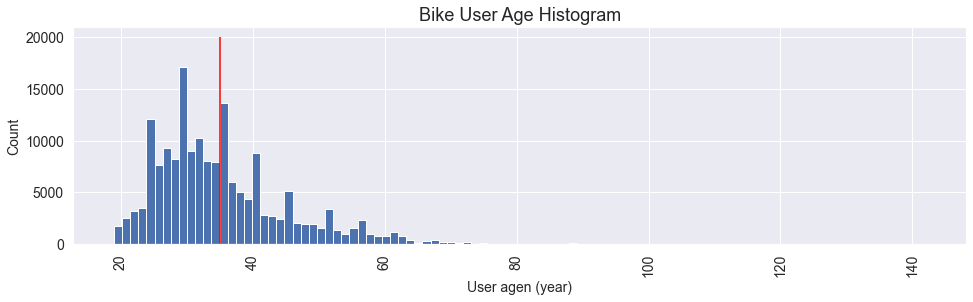

In [197]:
base_color = sb.color_palette()[0]
mean_age = trips_filt2['user_age'].mean()
plt.figure(figsize = (16,4))
bins=100
plt.hist(data = trips_filt2, x = 'user_age', color = base_color, bins=bins)
#sb.countplot(data = trips_filt2, x = 'user_age', color = base_color)
plt.xticks(rotation = 90)
plt.title('Bike User Age Histogram', fontsize = 18);
plt.xlabel('User agen (year)', fontsize = 14);
plt.ylabel('Count', fontsize = 14);

plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
#plt.ylim(0,1000)
#plt.xlim(0,12)
#plt.yscale('log')
plt.vlines(35, ymin = 0, ymax = 20000, color ='red');

In [43]:
trips_filt2['user_age'].describe();

#### The distribution of user_age is a normal/right-skewed distribtion. the distribution shows few outliers of bikers with ages > 80 years. This can be either be actual outliers or wrong entries into the data set.  Also, unreasonable ages reaching 142 years are reported. 

#### The majority of the bikers are 20-60 years old with the mean age of bikers is 35 years. the standard deviation of skewed distribution is 10 years. 

In [44]:
trips_filt2.head(1);

### Bikers' Gender

### Get statitistics per Gender

In [108]:
# get statitistics per Gender
gender_stats = trips_filt2.groupby(["member_gender"]).mean()
gender_stats

,start_station_id,end_station_id,bike_id,duration_hr,user_age
member_gender,,,,,
Female,138.107046,136.301630,4397.113565,0.216354,34.223698
Male,138.894529,136.305908,4507.615885,0.186776,35.453617
Other,152.867014,150.676995,4543.341376,0.277036,36.897998


In [109]:
# user count per gender
gender_ct = trips_filt2.groupby(["member_gender"]).size()
gender_ct;

In [110]:
# gender percentages among usersbikers
gender_perc = trips_filt2.groupby(["member_gender"]).size()/trips_filt2.shape[0]*100
gender_perc;

In [111]:
usertype_gender = trips_filt2.groupby(["member_gender",'user_type']).size()
usertype_gender;

In [112]:
gender_age = trips_filt2.groupby(['member_gender','user_age']).size()

In [113]:
#trips_filt2.groupby(['member_gender','duration_hr']).mean()

In [114]:
gender_stats.shape;

In [115]:
#gender_duration = trips_filt2.groupby(["member_gender", "duration_hr"]).mean()

### 4- Biker User Type

### Get statitistics per user type

In [116]:
# get statitistics per user Type
user_stats = trips_filt2.groupby(["user_type"]).mean()
user_stats

,start_station_id,end_station_id,bike_id,duration_hr,user_age
user_type,,,,,
Customer,135.650549,136.532114,4357.897139,0.364071,34.648618
Subscriber,139.352676,136.612055,4495.629248,0.177931,35.254208


In [117]:
usertype_ct = trips_filt2.groupby(["user_type"]).size()
usertype_ct;

In [118]:
# user percentages
user_perc = trips_filt2.groupby(["user_type"]).size()/trips_filt2.shape[0]*100
user_perc

user_type
Customer       9.468883
Subscriber    90.531117
dtype: float64

In [119]:
f_customer = 4623/(4623+11493+450)*100
m_customer = 11493/(4623+11493+450)*100
f_customer, m_customer;

In [120]:
f_subs = 36182/(36182+ 119007+3197)*100
m_subs = 119007/(36182+ 119007+3197)*100
f_subs, m_subs;

In [121]:
# get statitistics per user type
trips_filt.groupby(["user_type"]).mean()

,start_station_id,end_station_id,bike_id,duration_hr,user_age
user_type,,,,,
Customer,135.650549,136.532114,4357.897139,0.364071,34.648618
Subscriber,139.352676,136.612055,4495.629248,0.177931,35.254208


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> - The trip duration follows a log normal distribution. the mean trip duration is 0.1955 hours or ~ 11.7 minutes. Few trips reached up to 1.5 horus. The plot data can be transformed and the log10 of the trip duration can be plotted. 
> - The mean age of bikers is 35 years. There are unreasonable ages reported for bikers of ages reaching 142 years, which cannot be reaslistic. and should be removed from the dataset. Also, there are bikers with gender reported as others; these were not included in any statistics. 
>  
> - 23.3% of riders are females while 74.6% are males.  
> - Mean age of bikers per gender is more or less the same, 34.2 and 35.5 years, respectively for female and males.  
> - Average trip duration done by female is slightly longer than males. 
>
> - 90% of the bike users are subscribers that use the bikes for regular trips. 
> - The mean trip duration of subscribers is 0.17 horus. 
> ~ 10% of the users are customers that might either be tourists and/or people who need bike rides sporadically. The mean trip duration of customers is 0.36 hr (more than double that of regular users and subscriber). 
> - Females constitute 27.9% and 22.7% of the customer and subscriber bike users, respectively. 
> - Males constitute 69.4% and 75.1% of the customer and subscriber bike users, respectively. 
> - Mean age of user types is more or less the same, 34.6 and 35.3 years, respectively for customers and subscribers.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

#### Bike trip durations distributions with Gender.

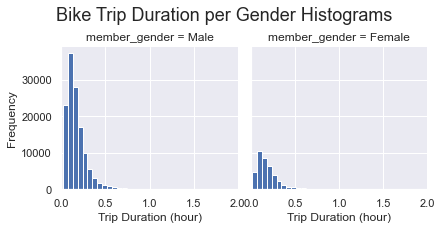

In [222]:
#fig = plt.figure(figsize = (16,4))

#bins = np.arange(0, trips_filt2['duration_hr'].max()+binsize, binsize);
#plt.figure(figsize = (16,4));
#plt.hist(data = trips_filt2, x = 'duration_hr', bins = bins, hue = 'member_gender');

#plt.subplot(1,3,1)
#formatted = "{:.3f}".format()
bins=420
#sb.countplot(data = trips_filt2, x = round(trips_filt2['duration_hr'],3), hue = 'member_gender')
#sb.set()
g = sb.FacetGrid(data = trips_filt2, col = 'member_gender', hue_order = ['Male', 'Female','Other'], 
                 margin_titles = True, legend_out = True);
g.map(plt.hist, 'duration_hr', bins = bins);
g.fig.suptitle('Bike Trip Duration per Gender Histograms', y=1.06, fontsize = 18) # can also get the figure from plt.gcf()
#g.set_titles('Bike Trip Duration per Gender Histograms', col_template = '{col_name}', fontsize = 14), 
#g.set_xlabel('Trip Duration (hour)',fontsize = 14)
#g.set_ylabel('Frequency', fontsize = 14)
g.set_axis_labels('Trip Duration (hour)','Frequency');
#g.add_legend();

#[plt.setp(ax.texts, text="") for ax in g.axes.flat] 
#binsize = 0.03
#plt.hist(data = trips_filt2, x = trips_filt2['duration_hr'], hue = 'member_gender')
plt.xlim(0,2);
#plt.ylim(0,100)
#plt.title('Bike Trip Duration per Gender Histograms', fontsize = 18)
#plt.xlabel(' Trip Duration (hour)',  fontsize = 14)
#plt.ylabel('Frequency', fontsize = 14)
#plt.tick_params(axis='x', labelsize=14)
#plt.legend(['Males','Others','Females'])

#plt.xticks([0.1,  10, 100, 1000, 10000], rotation = 90);

#### The distributions of trip durations per gender are both log normal distributions with a long tails. Due to the fact that females consittute only 23% of the bikers' population, the count of trips done by females are less than those done by males. 

#### Many statistics on bikers' gender, age, and user type reported in the above section can be visually represented as part of the bivariate exploration of the data.  The below shows the counts of subscribers vs. customers among the various biker's gender groups. As mentioned before, 90% of the bikers are subsribers. ~75% of subscribers are males. 

#### User-Type vs. Biker-Gender Data:

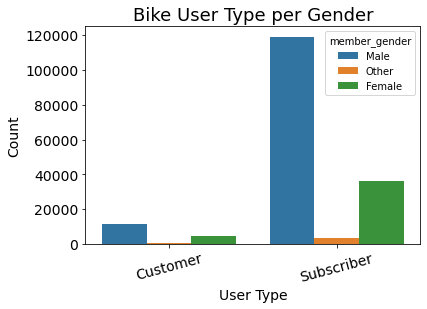

In [59]:
# get statitistics per Gender
gender_ct = trips_filt2.groupby(['member_gender', 'user_type']).size()
gender_ct = gender_ct.reset_index(name = 'count')
gender_ct = gender_ct.pivot(index = 'member_gender', columns = 'user_type', values = 'count')

sb.countplot(data = trips_filt2, x = 'user_type', hue = 'member_gender')
plt.xticks(rotation = 15)
plt.title('Bike User Type per Gender', fontsize = 18)
plt.xlabel('User Type', fontsize = 14)
plt.ylabel('Count', fontsize = 14)

plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

#### Biker Gender vs. Age Plots:
> The below box and violin plots show the distributions and quantiles of age and trip durations of the bikers segergated either as males and females or customres and subscribeers.

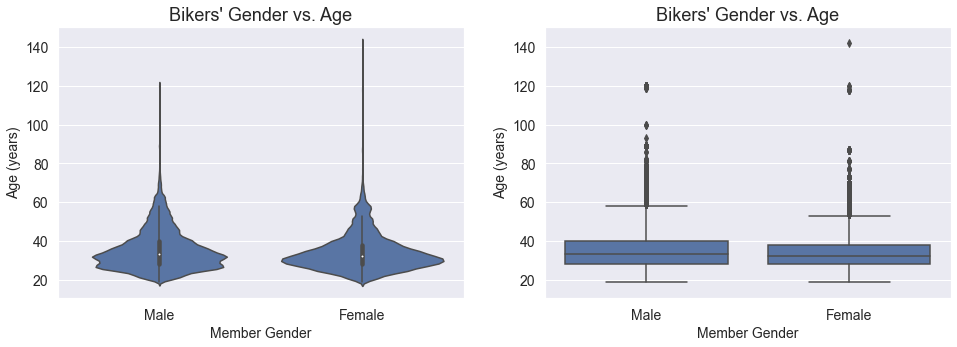

In [203]:
gender = ['Male', 'Female']

# Returns the gender of bikers
# Refer - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
tgender = pd.api.types.CategoricalDtype(ordered=True, categories = gender)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
trips_filt2['member_gender'] = trips_filt2['member_gender'].astype(tgender);

# Step 4.  TWO PLOTS IN ONE FIGURE
plt.figure(figsize = [16, 5])
base_color = sb.color_palette()[0]

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
#Let's return the axes object
ax1 = sb.violinplot(data = trips_filt2, x='member_gender', y='user_age', color=base_color, innner='quartile')
plt.title("Bikers' Gender vs. Age", fontsize = 18)
plt.xlabel('Member Gender', fontsize = 14)
plt.ylabel('Age (years)', fontsize = 14)

plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
#plt.xticks(rotation=15);

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = trips_filt2, x='member_gender', y='user_age', color=base_color)
plt.title("Bikers' Gender vs. Age", fontsize = 18)
plt.xlabel('Member Gender', fontsize = 14)
plt.ylabel('Age (years)', fontsize = 14)

plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
#plt.xticks(rotation=15);
plt.ylim(ax1.get_ylim()); # set y-axis limits to be same as left plot


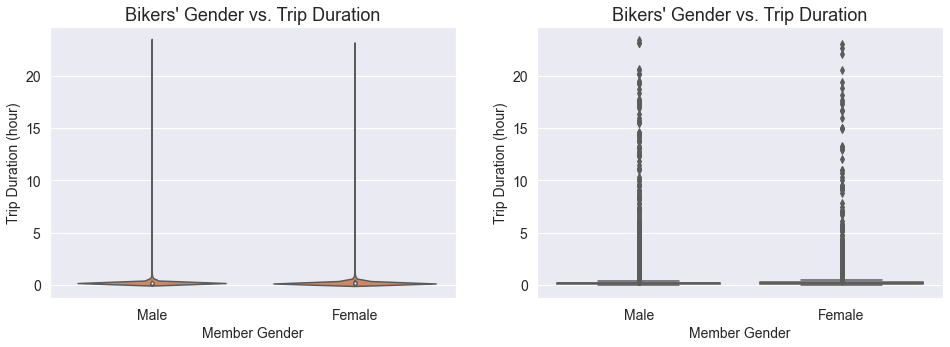

In [204]:
# Refer - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
tgender = pd.api.types.CategoricalDtype(ordered=True, categories = gender)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
trips_filt2['member_gender'] = trips_filt2['member_gender'].astype(tgender);

# Step 4.  TWO PLOTS IN ONE FIGURE
plt.figure(figsize = [16, 5])
base_color = sb.color_palette()[1]

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
#Let's return the axes object
ax1 = sb.violinplot(data = trips_filt2, x='member_gender', y='duration_hr', color=base_color, innner='quartile')
plt.title("Bikers' Gender vs. Trip Duration", fontsize = 18)
plt.xlabel('Member Gender', fontsize = 14)
plt.ylabel('Trip Duration (hour)', fontsize = 14)

plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
#plt.xticks(rotation=15);

#plt.xticks(rotation=15);

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = trips_filt2, x='member_gender', y='duration_hr', color=base_color)
plt.title("Bikers' Gender vs. Trip Duration", fontsize = 18)
plt.xlabel('Member Gender', fontsize = 14)
plt.ylabel('Trip Duration (hour)', fontsize = 14)

plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
#plt.xticks(rotation=15);
plt.ylim(ax1.get_ylim()); # set y-axis limits to be same as left plot

#### We can repeat the same plots showing the distribution of trip duration and biker age by user type. 

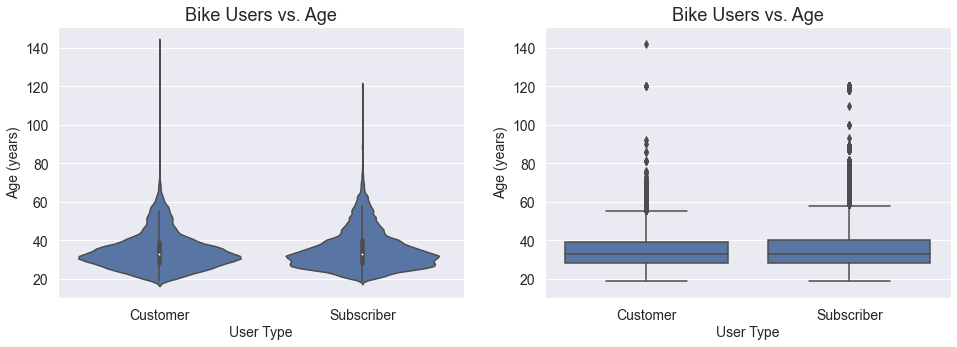

In [205]:
user = ['Customer', 'Subscriber']

# Returns the types for user Types
# Refer - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
tuser = pd.api.types.CategoricalDtype(ordered=True, categories = user)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
trips_filt2['user_type'] = trips_filt2['user_type'].astype(tuser);

# Step 4.  TWO PLOTS IN ONE FIGURE
plt.figure(figsize = [16, 5])
base_color = sb.color_palette()[0]

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
#Let's return the axes object
ax1 = sb.violinplot(data = trips_filt2, x='user_type', y='user_age', color=base_color, innner='quartile')
plt.title("Bike Users vs. Age", fontsize = 18)
plt.xlabel('User Type', fontsize = 14)
plt.ylabel('Age (years)', fontsize = 14)

plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
#plt.xticks(rotation=15);

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = trips_filt2, x='user_type', y='user_age', color=base_color)
plt.title("Bike Users vs. Age", fontsize = 18)
plt.xlabel('User Type', fontsize = 14)
plt.ylabel('Age (years)', fontsize = 14)

plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
#plt.xticks(rotation=15);
plt.ylim(ax1.get_ylim()); # set y-axis limits to be same as left plot


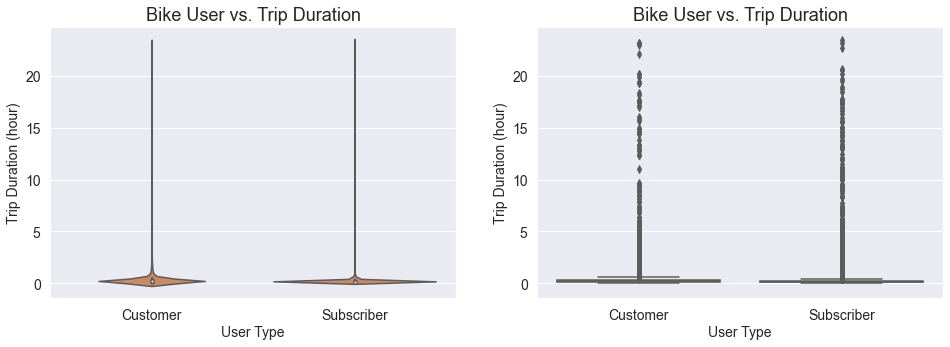

In [206]:
# Returns the user type 
# Refer - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
tuser = pd.api.types.CategoricalDtype(ordered=True, categories = user)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
trips_filt2['user_type'] = trips_filt2['user_type'].astype(tuser);

# Step 4.  TWO PLOTS IN ONE FIGURE
plt.figure(figsize = [16, 5])
base_color = sb.color_palette()[1]

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
#Let's return the axes object
ax1 = sb.violinplot(data = trips_filt2, x='user_type', y='duration_hr', color=base_color, innner='quartile')
plt.title("Bike User vs. Trip Duration", fontsize = 18)
plt.xlabel('User Type', fontsize = 14)
plt.ylabel('Trip Duration (hour)', fontsize = 14)

plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
#plt.xticks(rotation=15);

#plt.xticks(rotation=15);

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = trips_filt2, x='user_type', y='duration_hr', color=base_color)
plt.title("Bike User vs. Trip Duration", fontsize = 18)
plt.xlabel('User Type', fontsize = 14)
plt.ylabel('Trip Duration (hour)', fontsize = 14)

plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
#plt.xticks(rotation=15);
plt.ylim(ax1.get_ylim()); # set y-axis limits to be same as left plot

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

#### The above bivariate plots shows that there are trip durations that exceeds 5 hours. The source and reasons behind such long trip durations need to be investigated to see whether or not it is true.  
#### Also, some reported ages, reaching 142 years, are clearly unreasonable and wrong. 

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

> The 2 scatter plots show the relationship between age and trip durations for both female and male bikers. Jittering is added in the second plots as the data for both females and males are very simialr. A slight negative correlation (younger bikers ride longer trips) exists between age and trip durations for both female and male bikers.  

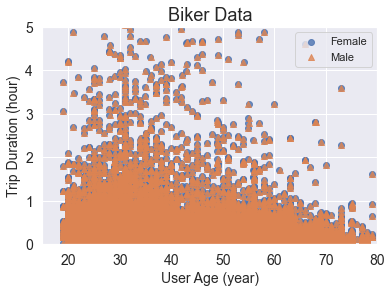

In [207]:
type_gender = [['Female', 'o'], ['Male', '^']]

for ttype, gender in type_gender:
    plot_data = trips_filt2.loc[trips_filt2['member_gender'] == ttype] 
    sb.regplot(data = trips_filt2, x = 'user_age', y = 'duration_hr', x_jitter = 0.04, fit_reg = False, marker = gender)

plt.title("Biker Data", fontsize = 18)
plt.xlabel('User Age (year)', fontsize = 14)
plt.ylabel('Trip Duration (hour)', fontsize = 14)


plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.xlim(15,80)
plt.ylim(0,5)
plt.legend(['Female', 'Male']);


The plot above shows overlapping data points.

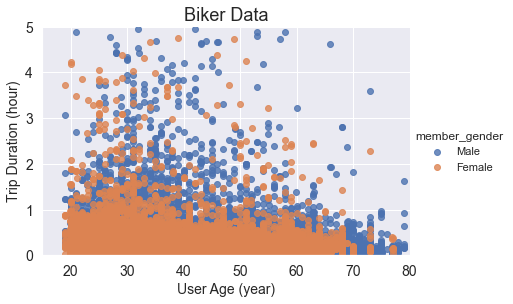

In [208]:
g = sb.FacetGrid (data = trips_filt2, hue = 'member_gender', hue_order = ['Male','Female'], 
                 size = 4, aspect = 1.5)

g = g.map(sb.regplot, 'user_age', 'duration_hr', x_jitter = 0.04, fit_reg = False)
plt.title('Biker Data', fontsize = 18)
plt.xlabel('User Age (year)', fontsize = 14)
plt.ylabel('Trip Duration (hour)', fontsize = 14)

plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.xlim(15,80)
plt.ylim(0,5)
#plt.xlim(18, 80)
g.add_legend();

#### To simplify the above plots, we can separate the data into separate scatter plots.

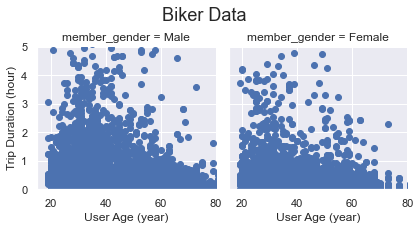

In [209]:
#plt.figure(figsize = [25, 10])
g = sb.FacetGrid(data = trips_filt2, col = 'member_gender')
g.map(plt.scatter, 'user_age','duration_hr')
g.fig.suptitle('Biker Data', y=1.06, fontsize = 18)
g.set_axis_labels('User Age (year)','Trip Duration (hour)')
#plt.title('Biker Data', fontsize = 18)
#plt.xlabel('User age (year)', fontsize = 14)
#plt.ylabel('Trip Duration (hour)', fontsize = 14)

#plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.xlim(15,80)
plt.ylim(0,5);
#plt.xlim(18, 80)

More mulitvativariate plots can be produced without revealing more correlation or insight into the feateures in the data set. They can simply help view the data on less crowded plots; like the below Facetted plots and histograms: 

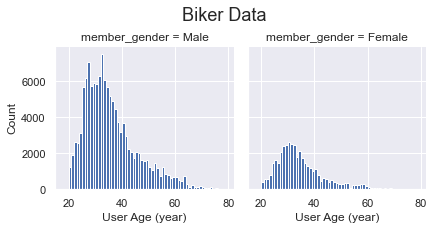

In [211]:
bins = np.arange(18, 80, 1)
#plt.figure(figsize = [10, 10])
g = sb.FacetGrid(data = trips_filt2, col = 'member_gender')
g.map(plt.hist, 'user_age', bins  = bins)
g.fig.suptitle('Biker Data', y=1.06, fontsize = 18)
g.set_axis_labels('User Age (year)','Count')

#plt.title("Age Distribution per Biker Gender", fontsize = 18)
#plt.xlabel('User Age (year)', fontsize = 14)
#plt.ylabel('Count', fontsize = 14)


#plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14);

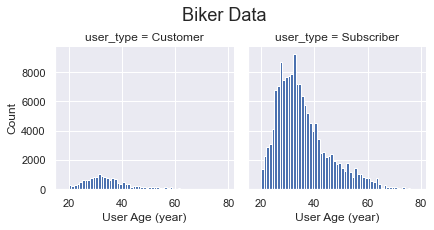

In [212]:
bins = np.arange(18, 80, 1)
#plt.figure(figsize = [10, 10])
g = sb.FacetGrid(data = trips_filt2, col = 'user_type')
g.map(plt.hist, 'user_age', bins  = bins)
g.fig.suptitle('Biker Data', y=1.06, fontsize = 18)
g.set_axis_labels('User Age (year)','Count')
#plt.title("Age Distribution per Biker Gender", fontsize = 18)
#plt.xlabel('User Age (year)', fontsize = 14)
#plt.ylabel('Count', fontsize = 14)


#plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?


### Were there any interesting or surprising interactions between features?

> The above multivariate plots are just more representations of the data set features combining information from various features on the same plot. The multivariate plots do not provide any more information not already summarized (in previous sections). 

### Project Explanatory Analysis  

#### Back to the questions posed at the begining of the project:  
> The main features investigated are the demographics of the bike riders in terms of their gender, bike usage types, age, and tip durations.  
> The data and exploratory analysis show:
>> - The bike service are used for short commutes as the meand trip duration dont exceed 15 minutes. >> - The majority of the users depend on the bike service and subsribers are 90% of the users. 
>> - The service seems to be more attractive to men than women as only 23% of the users are female. 
>> - The samge uers' age range exists among males and females. The mean age is 35 years which is very close to the mean age of both female and male bikers. 

> Unfortunately no distances are provided for the various starting-end station combinations to add this as a feature to the analysis. 

> Also, the time differences between date-time stamps of trip start and end could not be converted to a total duration in seconds, or be analyzed to busiest time of day. The trip duration feature provided was used instead. 

> With no maintenance schedule or information on he number of bikes per station, the inquireies about whethere more stations or more bikes per station are needed; or whether different maintainance schedules are needed for different stations. 

> No data is provided to see whether the percentge of female riders can be increased. 

> Finally, Unreasoble feature entries in the dataset (e.g., long trip durations, very old bikers) need to be investigated to confirm that they are errors. If proven so, such data need to be removed from teh data set and the analysis repeated.

In [1]:
jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle

SyntaxError: invalid syntax (<ipython-input-1-fdd865aff86d>, line 1)

(0.0, 5.0)

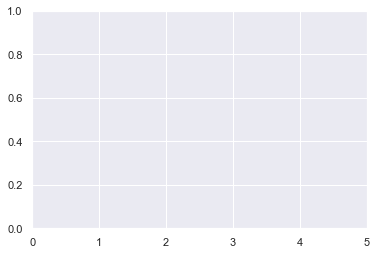

In [184]:
#%%capture output
#fig = plt.figure(figsize = (16,4))
#ax = plt.gca()
#ax.set_title('Bike Trip Duration per Gender Histograms', fontweight = "bold", size = 18)
#ax.set_xlabel(' Trip Duration (hour)', fontweight = "bold", size = 14)
#ax.set_ylabel('Frequency', fontweight = "bold", size = 14)


#bins = np.arange(0, trips_filt2['duration_hr'].max()+binsize, binsize);


#plt.figure(figsize = (16,4));
#plt.hist(data = trips_filt2, x = 'duration_hr', bins = bins, hue = 'member_gender');
#plt.subplot(1,3,1)
#formatted = "{:.3f}".format()
#bins=80
#sb.countplot(data = trips_filt2, x = round(trips_filt2['duration_hr'],3), hue = 'member_gender')

#g = sb.FacetGrid(data = trips_filt2, col = 'member_gender', margin_titles = True);
#g.map(plt.hist, 'duration_hr', bins = bins);
#g.set_titles(col_template = '{col_name}')
#[plt.setp(ax.texts, text="") for ax in g.axes.flat] 


#binsize = 0.03
#plt.hist(data = trips_filt2, x = trips_filt2['duration_hr'], hue = 'member_gender')
plt.xlim(0,5)
#plt.ylim(0,100)
#plt.title('Bike Trip Duration per Gender Histograms', fontsize = 18)


#plt.xlabel(' Trip Duration (hour)',  fontsize = 14)
#plt.ylabel('Frequency', fontsize = 14)
#plt.tick_params(axis='x', labelsize=14)
#plt.legend(['Males','Others','Females'])

#plt.xticks([0.1,  10, 100, 1000, 10000], rotation = 90);